In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
np.set_printoptions(suppress=True) #numpy scientific notation OFF

In [3]:
lambda_t = 3.596    # transport MFP
lambda_f = 16.89    # fission MFP
nu       = 2.637    # number of secondary neutron per fissionn
N_A      = 6.02e23  # Avogadro's number

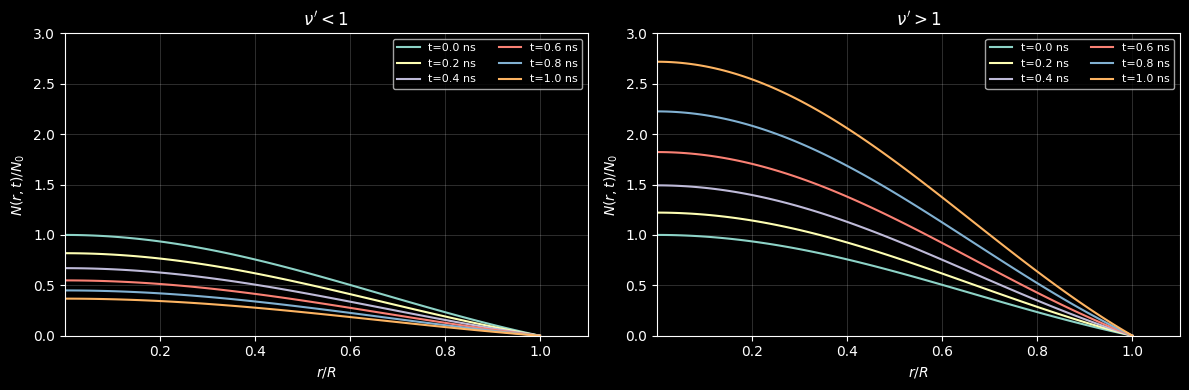

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6*2, 4))
rmin, rmax = 1e-5, 1
r_axis = np.linspace(rmin, rmax, 100)
f = np.sin(np.pi*r_axis) / (np.pi*r_axis)
for ax, nuprime, sign in zip(axs.flat, [-1,1], ['<', '>']):
    for t in range(0, 21, 4):
        t /= 20
        ax.plot(r_axis, f*np.exp(nuprime*t), label=f't={t} ns')
    ax.set(xlabel='$r/R$', ylabel='$N(r,t)/N_0$', title=fr"$\nu' {sign} 1$",
           xlim=[rmin, 1.1*rmax], ylim=[0., 3])
    ax.grid(zorder=0, alpha=0.25, lw=0.5);
    ax.legend(ncol=2, fontsize=8, loc='upper right')
    ax.axvline(x=np.pi, ls='--', lw=1);
plt.tight_layout()

R_c = 11.05 cm
M_c = 105.75 kg


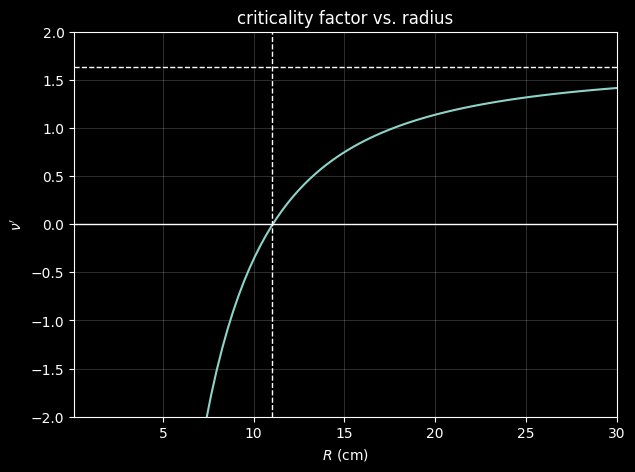

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
rmin, rmax = 0.1, 30
r_axis = np.linspace(rmin, rmax, 100)
#================== U-235 =====================
# critical mass 
N_A, rho, A = 6.02e23, 18.71, 235
nu = 2.637
sigma_f = 1.235
sigma_t = 4.566 + sigma_f
R_c = np.pi*A/(rho*N_A) * 1/(3*(nu-1)*sigma_f*sigma_t*(1e-24)**2)**(1/2)
M_c = 4*np.pi**4 * A**3/(3*rho**2*N_A**3) * 1/(3*(nu-1)*sigma_f*sigma_t*(1e-24)**2)**(3/2)
# M_cb= 4/3*np.pi*rho*R_c**3
print(f'R_c = {R_c:.2f} cm')
print(f'M_c = {M_c*1e-3:.2f} kg')

nu_prime = (nu-1) - np.pi**2*lambda_f*lambda_t / (3*r_axis**2)
ax.plot(r_axis, nu_prime)
ax.set(xlabel='$R$ (cm)', ylabel=r"$\nu'$", title='criticality factor vs. radius',
       xlim=[rmin, rmax], ylim=[-2, 2])
ax.grid(zorder=0, alpha=0.25, lw=0.5);
ax.axhline(y=0, ls='-', lw=1);
ax.axhline(y=nu-1, ls='--', lw=1);
ax.axvline(x=11, ls='--', lw=1);

In [6]:
kappa = np.sqrt(3*(nu-1)/(lambda_t*lambda_f))
kappa

0.28435462784623305

In [7]:
# R_c Dirichlet BC (elementary diffusion)
R_c = np.pi/kappa
print(f'R_c = {R_c:.2f} cm')
# critical mass
print(f'M_c = {4/3*np.pi*(18.71) * R_c**3 * 1e-3:.2f} kg')

R_c = 11.05 cm
M_c = 105.69 kg


C:\Users\jorge\AppData\Local\Temp\ipykernel_21636\2360059296.py:5: RuntimeWarning: invalid value encountered in true_divide
  f2 = 1-kappa*R_axis/np.tan(kappa*R_axis)


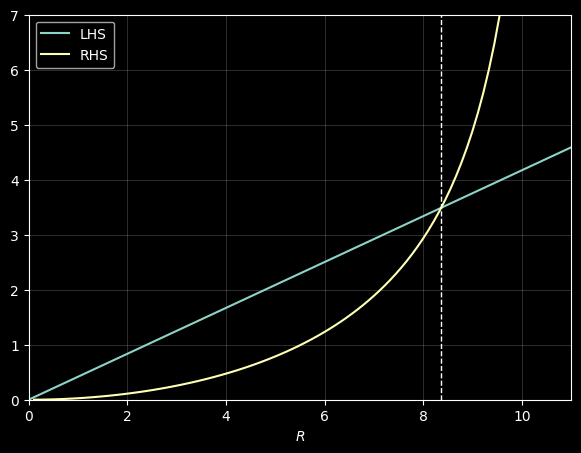

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
Rmin, Rmax = 0, 11
R_axis = np.linspace(Rmin, Rmax, 100)
f1 = 3*R_axis/(2*lambda_t)
f2 = 1-kappa*R_axis/np.tan(kappa*R_axis)
ax.plot(R_axis, f1, label='LHS')
ax.plot(R_axis, f2, label='RHS')
ax.set(xlabel='$R$', xlim=[Rmin, Rmax], ylim=[0, 7])
# ax.set(xlabel='$R$', xlim=[8.34, 8.38], ylim=[3.45, 3.50])
ax.grid(zorder=0, alpha=0.25, lw=0.5);
ax.legend()
ax.axvline(x=8.369, ls='--', lw=1);
# fig.savefig('Trinity-data.pdf', bbox_inches='tight')

In [9]:
# R_c Neumann BC (advanced diffusion)
R_c = 8.369
print(f'R_c = {R_c:.2f} cm')
# critical mass
print(f'M_c = {4/3*np.pi*(18.71) * R_c**3 * 1e-3:.2f} kg')

R_c = 8.37 cm
M_c = 45.94 kg


In [10]:
# R_c Frisch-Peierls
R_c = 2.6 * 0.8
print(f'R_c = {R_c:.2f} cm')
# critical mass
print(f'M_c = {4/3*np.pi*(15) * R_c**3 * 1e-3:.2f} kg')

R_c = 2.08 cm
M_c = 0.57 kg


In [12]:
# critical mass U-235
rho, A  = 18.71, 235       # density (gr/cm^3), atomic mass (gr/mol)
sigma_f = 1.235            # fission cross-section (barns)
sigma_t = 4.566 + sigma_f  # transport cross-section (barns)
nu      = 2.637            # secondary neutrons per fission

R_c = np.pi*A/(rho*N_A) * 1/(3*(nu-1)*sigma_f*sigma_t*(1e-24)**2)**(1/2)
M_c = 4*np.pi**4 * A**3/(3*rho**2*N_A**3) * 1/(3*(nu-1)*sigma_f*sigma_t*(1e-24)**2)**(3/2)
# M_cb= 4/3*np.pi*rho*R_c**3
print('U-235')
print(f'R_c = {R_c:.2f} cm')
print(f'M_c = {M_c*1e-3:.2f} kg')

U-235
R_c = 11.05 cm
M_c = 105.75 kg


In [13]:
# critical mass Pu-239
rho, A  = 15.6, 239        # density (gr/cm^3), atomic mass (gr/mol)
sigma_f = 1.80             # fission cross-section (barns)
sigma_t = 4.394 + sigma_f  # transport cross-section (barns)
nu      = 3.172            # secondary neutrons per fission

R_c = np.pi*A/(rho*N_A) * 1/(3*(nu-1)*sigma_f*sigma_t*(1e-24)**2)**(1/2)
M_c = 4*np.pi**4 * A**3/(3*rho**2*N_A**3) * 1/(3*(nu-1)*sigma_f*sigma_t*(1e-24)**2)**(3/2)
M_cb= 4/3*np.pi*rho*R_c**3
print('Pu-239')
print(f'R_c = {R_c:.2f} cm')
print(f'M_c = {M_c*1e-3:.2f} kg [{M_cb*1e-3:.2f} kg]')

Pu-239
R_c = 9.38 cm
M_c = 53.93 kg [53.93 kg]
